In [1]:
import numpy as np 
import random, os
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [2]:
weather_path = r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\CAISO_zone_1_.csv'
save_path = r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\savedData\CAISO_zone_1_.csv'

In [3]:
iso_list = [ 'CAISO','NYISO','PJM','ERCOT','MISO','SPP']
iso_zone_list = {
    'CAISO':['CAISO_zone_'+str(num)+"_"  for num in range(1,4+1)],
    'NYISO':['NYISO_zone_'+str(num)+"_"  for num in range(1,11+1)],
    'PJM':['PJM_zone_'+str(num)+"_"  for num in range(1,20+1)],
    'ERCOT':['ERCOT_zone_'+str(num)+"_"  for num in range(1,8+1)],
    'MISO':['MISO_zone_'+str(num)+"_"  for num in range(1,6+1)],
    'SPP':['SPP_zone_'+str(num)+"_"  for num in range(1,17+1)],
}
year_list = ['2018','2019','2020']

In [4]:
data = pd.read_csv(weather_path, delimiter = ',')

In [5]:
data.head()

,time,load_power,wind_power,solar_power,DHI,DNI,GHI,Dew Point,Solar Zenith Angle,Wind Speed,Relative Humidity,Temperature
0,2018-01-01 00:00:00,0.785327,0.004276,0.0,0.0,0.0,0.0,-7.7,168.880,1.2,23.78,12.5
1,2018-01-01 00:01:00,0.784770,0.004346,0.0,0.0,0.0,0.0,-7.7,168.842,1.2,23.78,12.5
2,2018-01-01 00:02:00,0.784213,0.004416,0.0,0.0,0.0,0.0,-7.7,168.804,1.2,23.78,12.5
3,2018-01-01 00:03:00,0.783657,0.004486,0.0,0.0,0.0,0.0,-7.7,168.766,1.2,23.78,12.5
4,2018-01-01 00:04:00,0.783100,0.004556,0.0,0.0,0.0,0.0,-7.7,168.728,1.2,23.78,12.5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573923 entries, 0 to 1573922
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   time                1573923 non-null  object 
 1   load_power          1573923 non-null  float64
 2   wind_power          1573923 non-null  float64
 3   solar_power         1573923 non-null  float64
 4   DHI                 1573923 non-null  float64
 5   DNI                 1573923 non-null  float64
 6   GHI                 1573923 non-null  float64
 7   Dew Point           1573923 non-null  float64
 8   Solar Zenith Angle  1573923 non-null  float64
 9   Wind Speed          1573923 non-null  float64
 10  Relative Humidity   1573923 non-null  float64
 11  Temperature         1573923 non-null  float64
dtypes: float64(11), object(1)
memory usage: 144.1+ MB


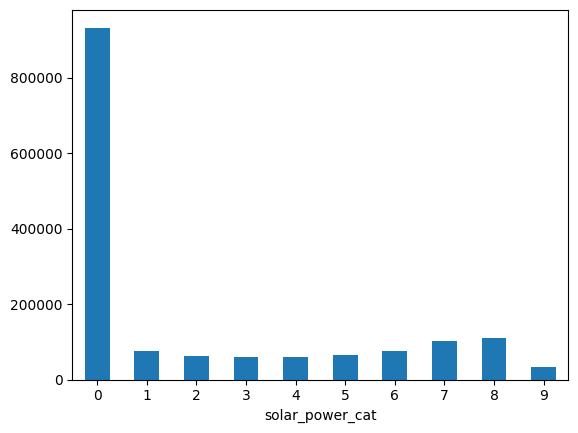

In [14]:
data["solar_power_cat"] = pd.cut(data["solar_power"],bins=10,
                               labels=False)
data["solar_power_cat"].value_counts().sort_index().plot.bar(rot=0)
plt.show()
#why are the bins split up like this?

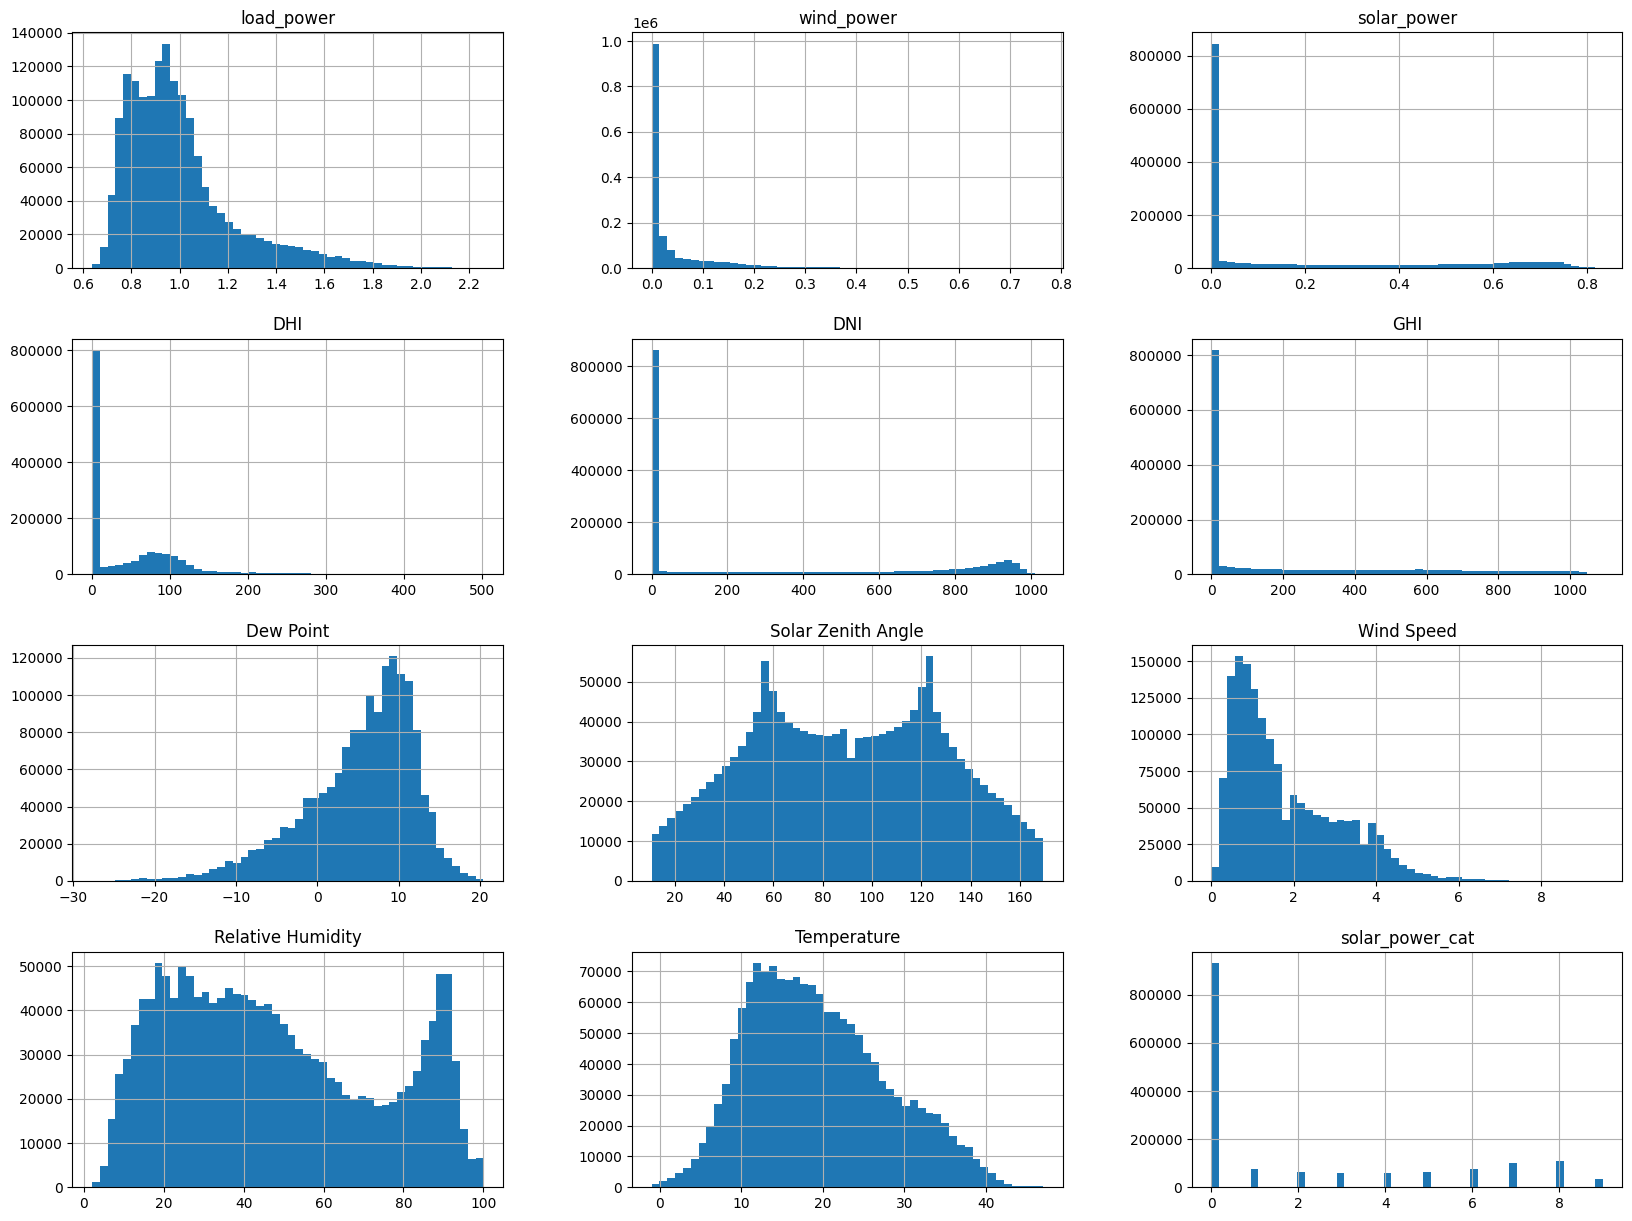

In [59]:
data.hist(bins=50, figsize=(20,15))
plt.show()

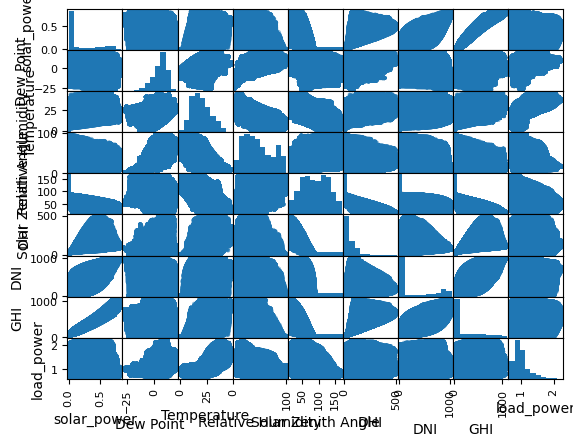

In [61]:
from pandas.plotting import scatter_matrix
attritbutes = ["solar_power","Dew Point","Temperature","Relative Humidity", "Solar Zenith Angle", "DHI", "DNI", "GHI", "load_power"]
scatter_matrix(data[attritbutes])
plt.show()

In [12]:
print((data["time"][100000]))
date_format = '%Y-%m-%d %H:%M:%S'
date_obj = datetime.strptime(data["time"][100000], date_format)
print(date_obj)

print(date_obj.time())

2018-03-11 10:40:00
2018-03-11 10:40:00
10:40:00


In [58]:
attributes= ["time", "solar_power", "GHI", "DHI", "DNI", "Solar Zenith Angle"]
date_format = '%Y-%m-%d %H:%M:%S'
df = pd.DataFrame(data[attributes])
df['time'] = pd.to_datetime(df['time'], format=date_format)

In [59]:
df['time'] = df['time'].dt.time

In [52]:
df = df.iloc[:1440]
df['time'] = df['time'].dt.time

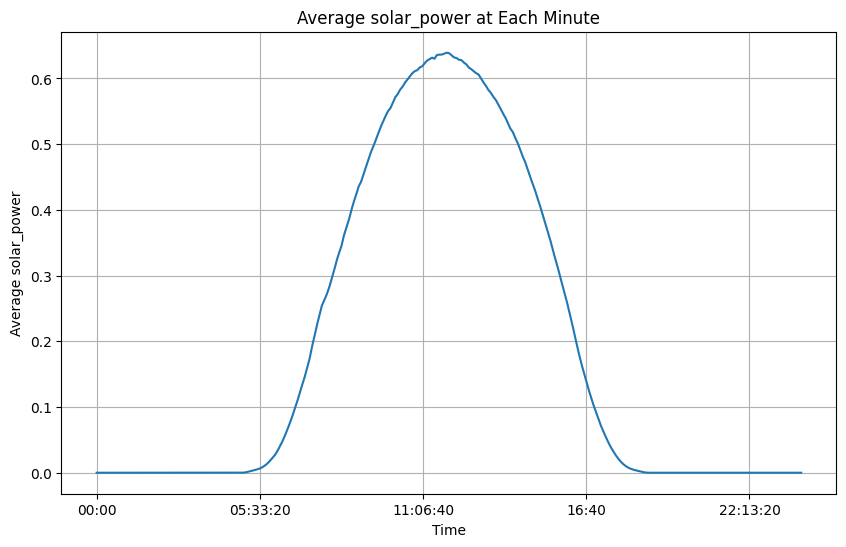

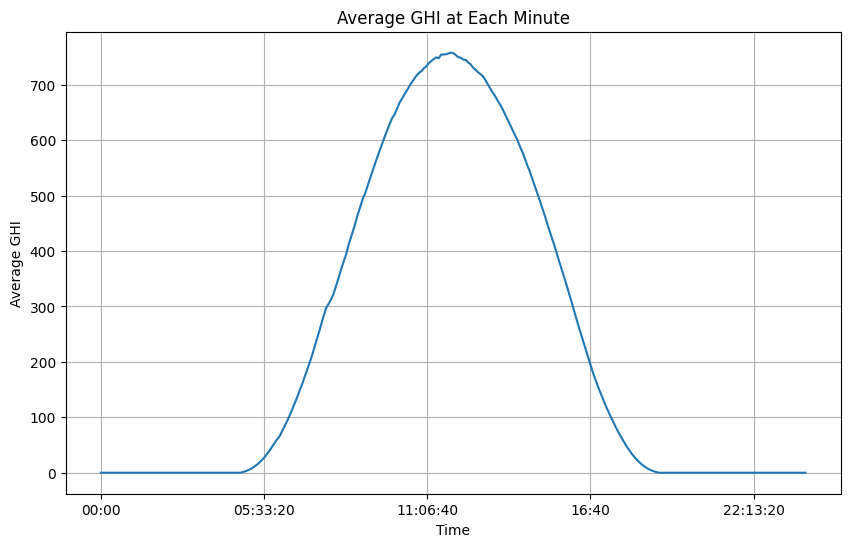

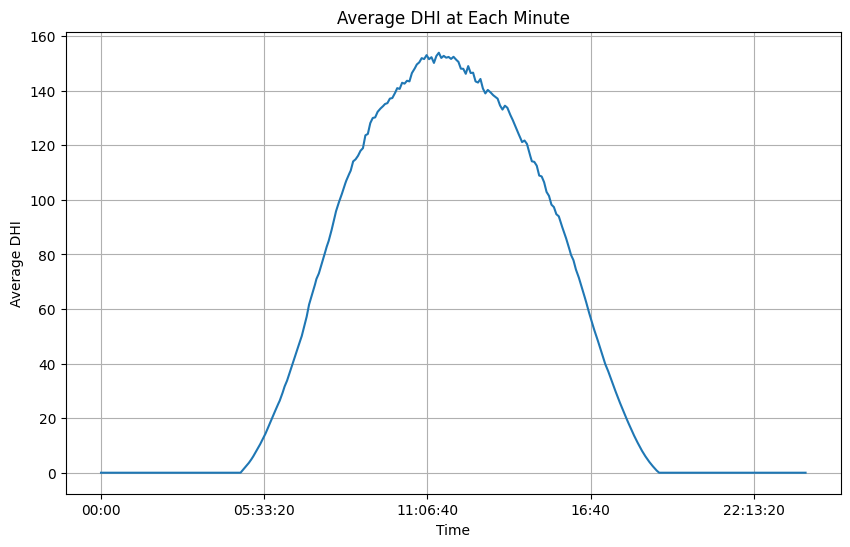

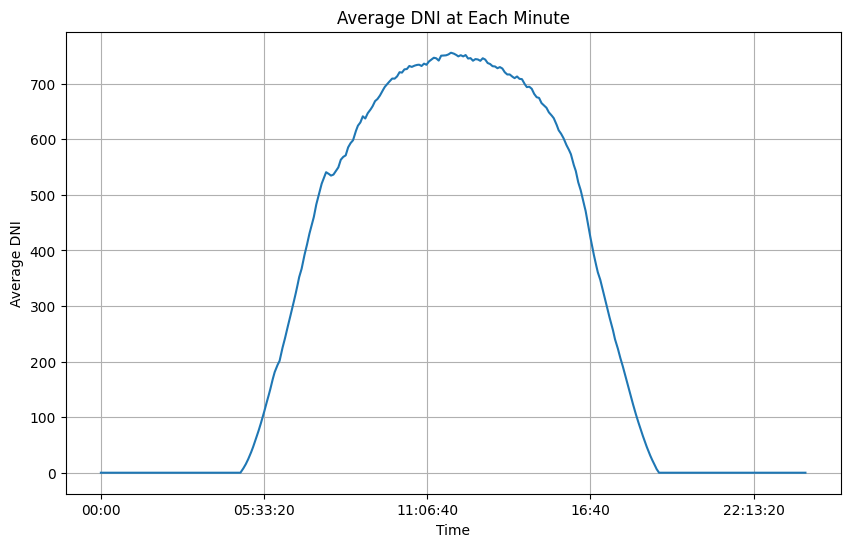

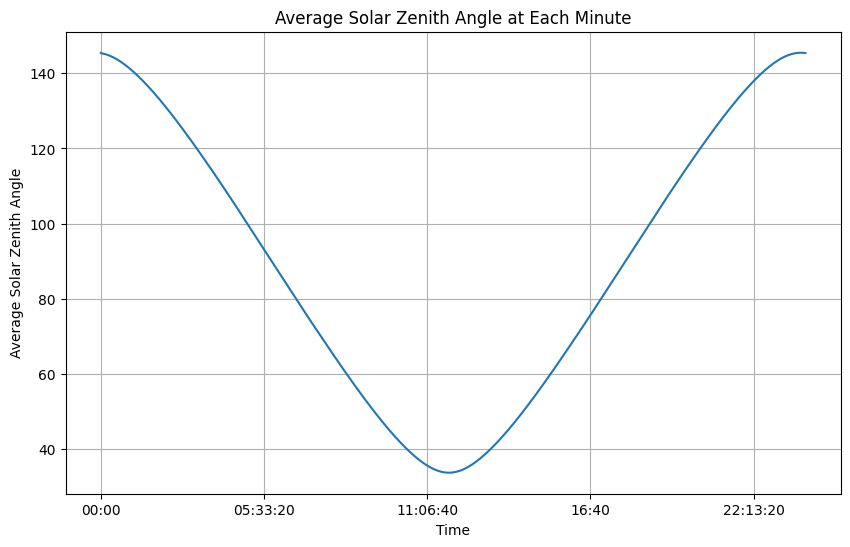

In [60]:
for attribute in attributes:
    if attribute == "time":
        continue
    average = df.groupby('time')[attribute].mean()
    plt.figure(figsize=(10, 6))
    average.plot(kind='line')
    plt.xlabel('Time')
    plt.ylabel(f'Average {attribute}')
    plt.title(f'Average {attribute} at Each Minute')
    plt.grid(True)
    plt.show()

In [34]:
def read_solar_weather_csv(location, year, file_name, save_path):
    data = pd.read_csv(file_name, delimiter = ',', skiprows=2)
    data['time_str'] = data.apply(lambda row: str(int(row['Year']))+"-"+str(int(row['Month']))+"-"+str(int(row['Day']))+' '+str(int(row['Hour']))+':'+str(int(row['Minute'])), axis=1)
    data['time'] = data.apply(lambda row: datetime.strptime(row['time_str'], '%Y-%m-%d %H:%M'), axis=1)
    column_list_raw = ['time','DHI','DNI','GHI','Dew Point','Solar Zenith Angle', 'Wind Speed','Relative Humidity', 'Temperature']
    weather_raw = data[column_list_raw].copy()
    weather_interp = pd.DataFrame()
    time_interp = pd.date_range(start='1-1-'+year, end='12-31-'+year, freq='1T')
    weather_interp['time'] = time_interp
    for i in range(1, len(column_list_raw)):
        column_tmp = column_list_raw[i]
        column_interp = np.interp(time_interp, data['time'].copy(), data[column_tmp].copy())
        weather_interp[column_tmp] = column_interp
    weather_raw.to_csv(save_path+'weather_'+location+year+'.csv')
    weather_interp.to_csv(save_path+'weather_interp_'+location+year+'.csv')

In [35]:
folder_list = next(os.walk(weather_path))[1]
for iso_tmp in iso_list:
        print(iso_tmp)
        iso_zone_list_tmp = iso_zone_list[iso_tmp]
        for iso_zone_tmp in iso_zone_list_tmp:
            for folder in folder_list:
                if folder.startswith(iso_zone_tmp):
                    subfolder  = weather_path+folder
                    for year in year_list:
                        print(iso_zone_tmp+year)
                        for root, direct, files in os.walk(subfolder+'/'):
                            for file in files:
                                if file.endswith(year+'.csv'):
                                    solar_data = read_solar_weather_csv(
                                        location=iso_zone_tmp, year=year, 
                                        file_name = subfolder+'/'+file,
                                        save_path=save_path)
            

CAISO
NYISO
PJM
ERCOT
MISO
SPP
